# Superstore Data Analysis

## Importing Python Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os


## Reading DataSet

In [2]:
df = pd.read_csv("SampleSuperstore.csv",encoding="windows-1254")
print("File imported Successfully")

File imported Successfully


## Exploratory Data Analysis & Pre-Processing of Data

### Peak Data in the Data Set

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Base Data in the Data Set

In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Various Columns in the Data

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Countries Related with Data

In [6]:
print(df["Country"].unique())

['United States']


### Various Shipping Modes in Data

In [7]:
print(df["Ship Mode"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


### Various Segments in Data 

In [8]:
print(df["Segment"].unique())

['Consumer' 'Corporate' 'Home Office']


### Number of Products in each Category

In [9]:
print(df["Category"].value_counts())

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


### Total Number of Products in each Category

In [10]:
print(df["Category"].value_counts().sum())

9994


### Various Cities in Data 

In [11]:
print(df["City"].unique())

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

### Number of Sub-categories Products are Divided

In [12]:
df["Sub-Category"].nunique()

17

### Total Number of Products in each Sub-Category

In [13]:
df["Sub-Category"].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

### Various States in Data

In [14]:
print(df["State"].unique())

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


### Various Regions sales Occured

In [15]:
print(df["Region"].unique())

['South' 'West' 'Central' 'East']


### Number of Sales at Various Regions

In [16]:
df["Region"].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

### Dropping Country and Postal Code Columns from Data

In [17]:
df=df.drop(columns=["Country","Postal Code"])
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Statistical Description of the Data

In [18]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Dimensions of Data

In [19]:
df.shape

(9994, 11)

### Number of Unique Values in each Column

In [20]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Columns Type & Summary 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


### Null Values in Data Set

In [22]:
df.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Column Data Types 

In [23]:
df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### Unique Data in each Column

In [24]:
for col in df:
    print(df[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorad

### Number of Duplicate Values in Data

In [25]:
df.duplicated().sum()

50

### Visualization of Missing Values

<Axes: >

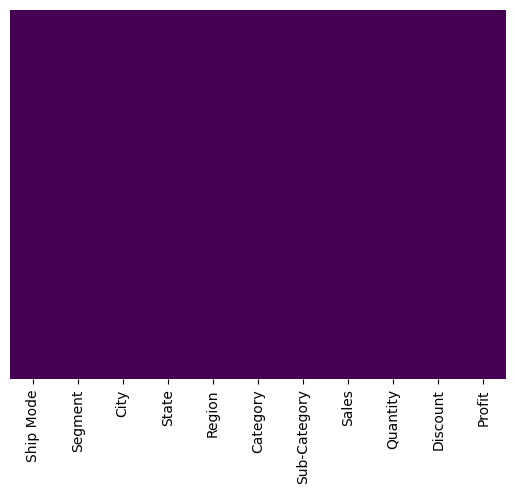

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### Dropping of Duplicate Values

In [27]:
df.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Slicing of Data

In [28]:
df.iloc[0]

Ship Mode       Second Class
Segment             Consumer
City               Henderson
State               Kentucky
Region                 South
Category           Furniture
Sub-Category       Bookcases
Sales                 261.96
Quantity                   2
Discount                 0.0
Profit               41.9136
Name: 0, dtype: object

In [29]:
df.iloc[:,0]

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: Ship Mode, Length: 9994, dtype: object

## Summary of Data

In [30]:
df.value_counts()

Ship Mode       Segment      City           State         Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     Los Angeles    California    West     Office Supplies  Paper         19.440   3         0.0        9.3312      4
                Corporate    Houston        Texas         Central  Office Supplies  Paper         15.552   3         0.2        5.4432      3
                Consumer     San Francisco  California    West     Office Supplies  Paper         25.920   4         0.0        12.4416     2
                             Detroit        Michigan      Central  Furniture        Chairs        389.970  3         0.0        35.0973     2
                             Philadelphia   Pennsylvania  East     Office Supplies  Paper         20.736   4         0.2        7.2576      2
                                                                                                                                           ..
Second Clas

## Data Visualization 

### Bar Plot Between Sub-Category Vs Category

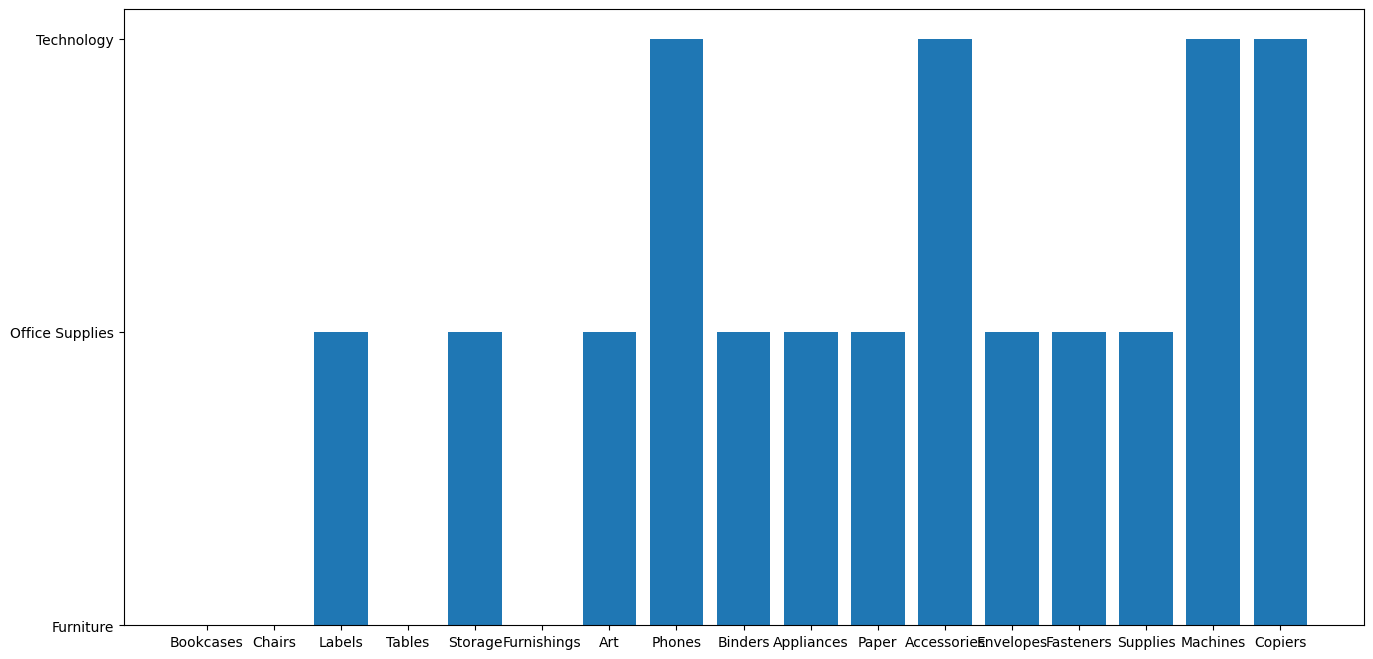

In [31]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df)
plt.show()


1.> In Furniture Category the frequency of Individual item is very less
2.> In office supplies the frequency of individual item is medium
3.> Where as in Technology the frequency of individual item is high

## Pie Plot of Sub-Category

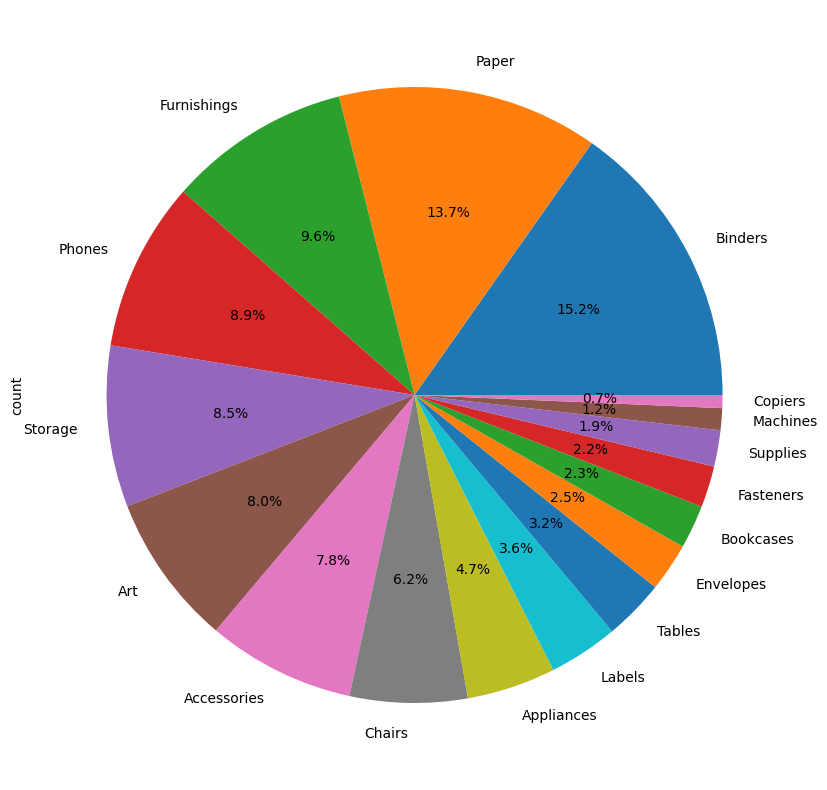

In [32]:
plt.figure(figsize=(12,10))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of office supplies especially in Binders and Paper Department

## Bar Plot of Sales Vs Profit

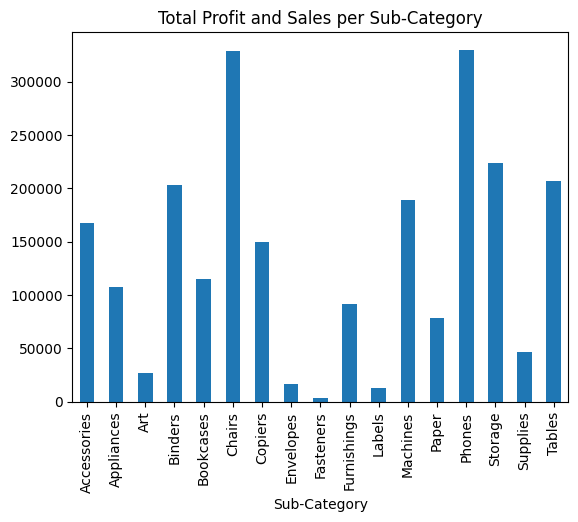

In [33]:
df.groupby("Sub-Category")["Sales"].sum().plot.bar()
plt.title("Total Profit and Sales per Sub-Category")
#plt.legend('Profit')
#plt.legend('Sales')
plt.rcParams["figure.figsize"] = [10,8]
plt.show()

## Count Plot of Cities

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

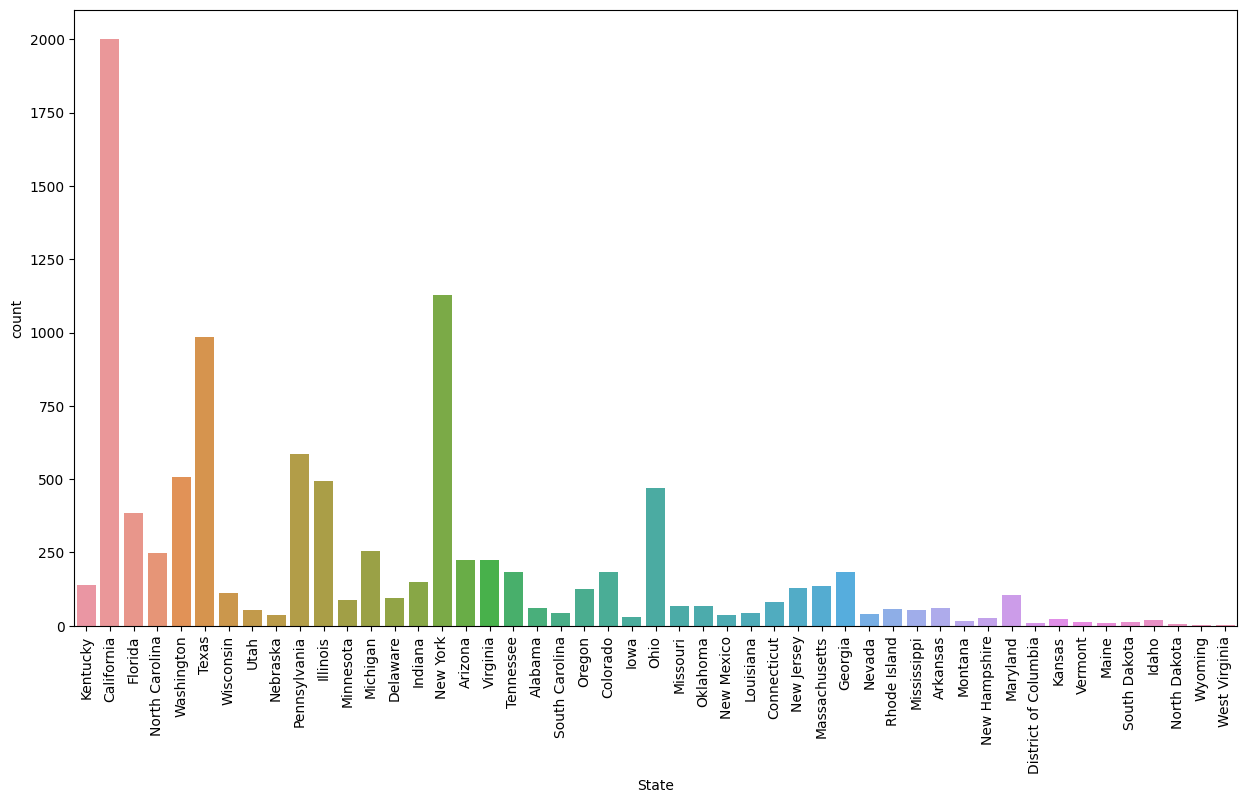

In [34]:
print(df["State"].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df["State"])
plt.xticks(rotation=90)
plt.show()

## Which Region has More Number of Sales & Profit

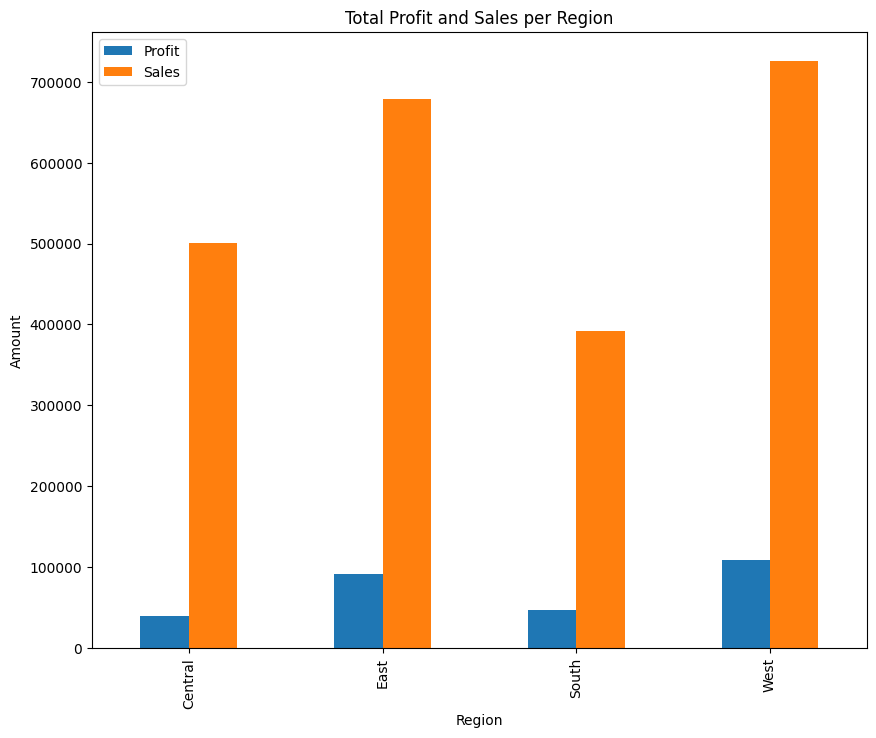

In [35]:
df.groupby('Region')[['Profit', 'Sales']].agg('sum').plot.bar()
plt.title('Total Profit and Sales per Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.rcParams['figure.figsize'] = [10, 8]
plt.legend(['Profit', 'Sales'])
plt.show()


### Count Plot of Sub-Categories

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


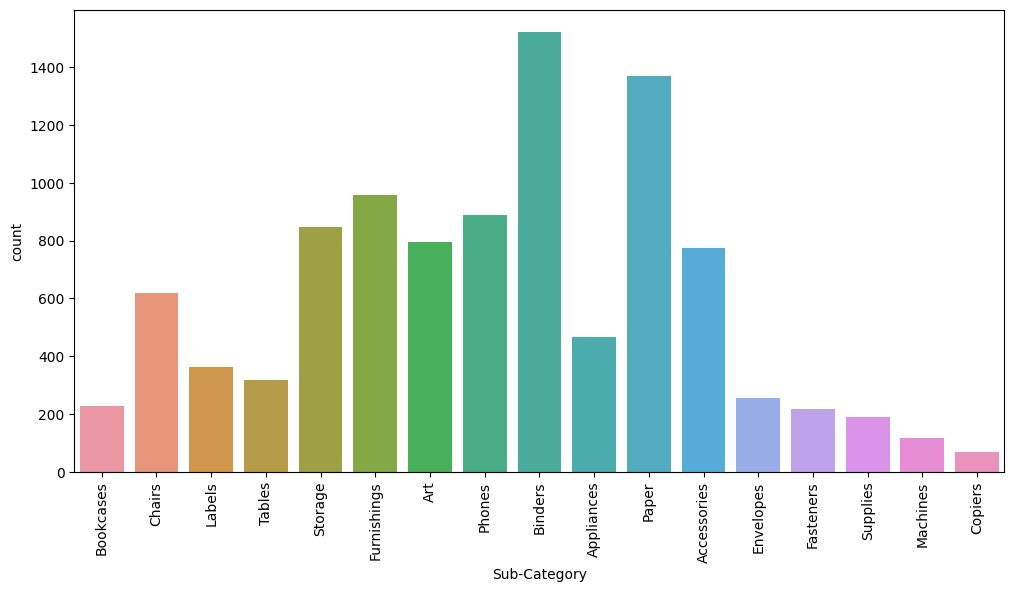

In [57]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

### Count Plot of Segments

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


<Axes: xlabel='Segment', ylabel='count'>

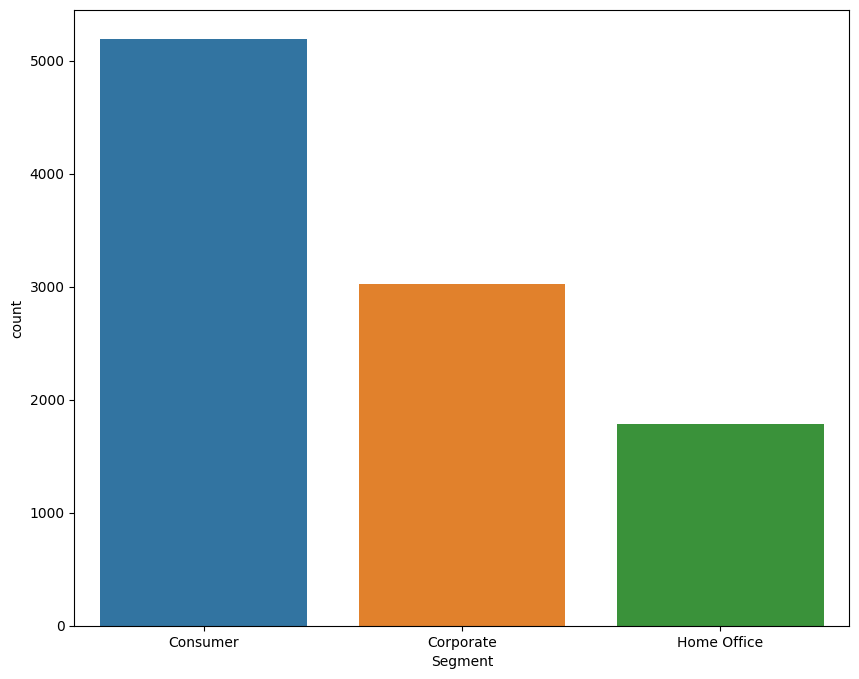

In [37]:
print(df['Segment'].value_counts())
sns.countplot(x=df["Segment"])

## What's Most Profitable Segment

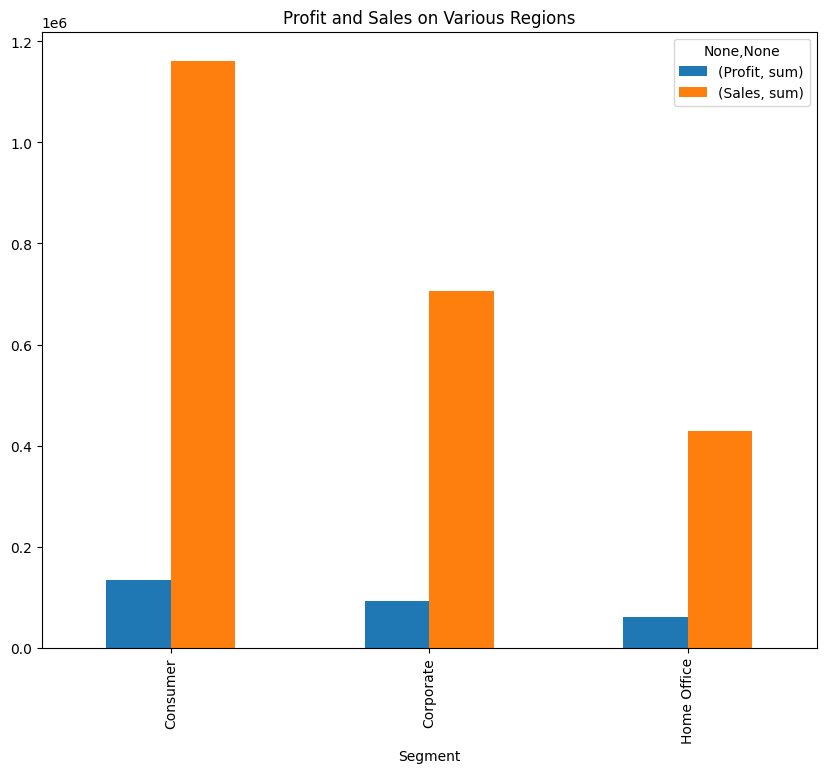

<Figure size 1200x600 with 0 Axes>

In [38]:
df.groupby('Segment')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Profit and Sales on Various Regions')
plt.figure(figsize = (12, 6))
plt.show()

## Count Plot of Regions

<Axes: xlabel='Region', ylabel='count'>

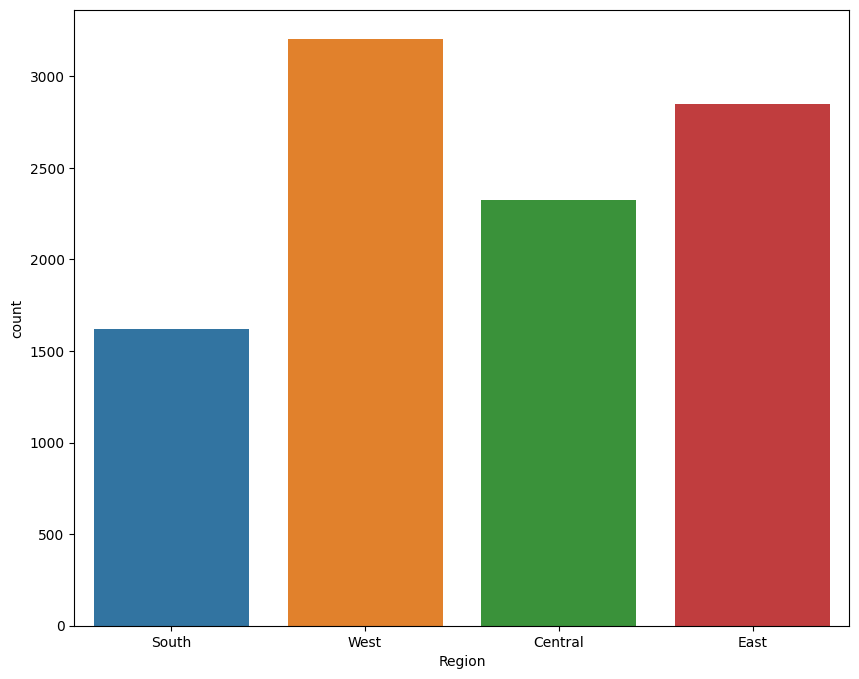

In [39]:
sns.countplot(x=df['Region'])


## Bar Plot of Profits in Sub-Category

<Axes: xlabel='Sub-Category', ylabel='Profit'>

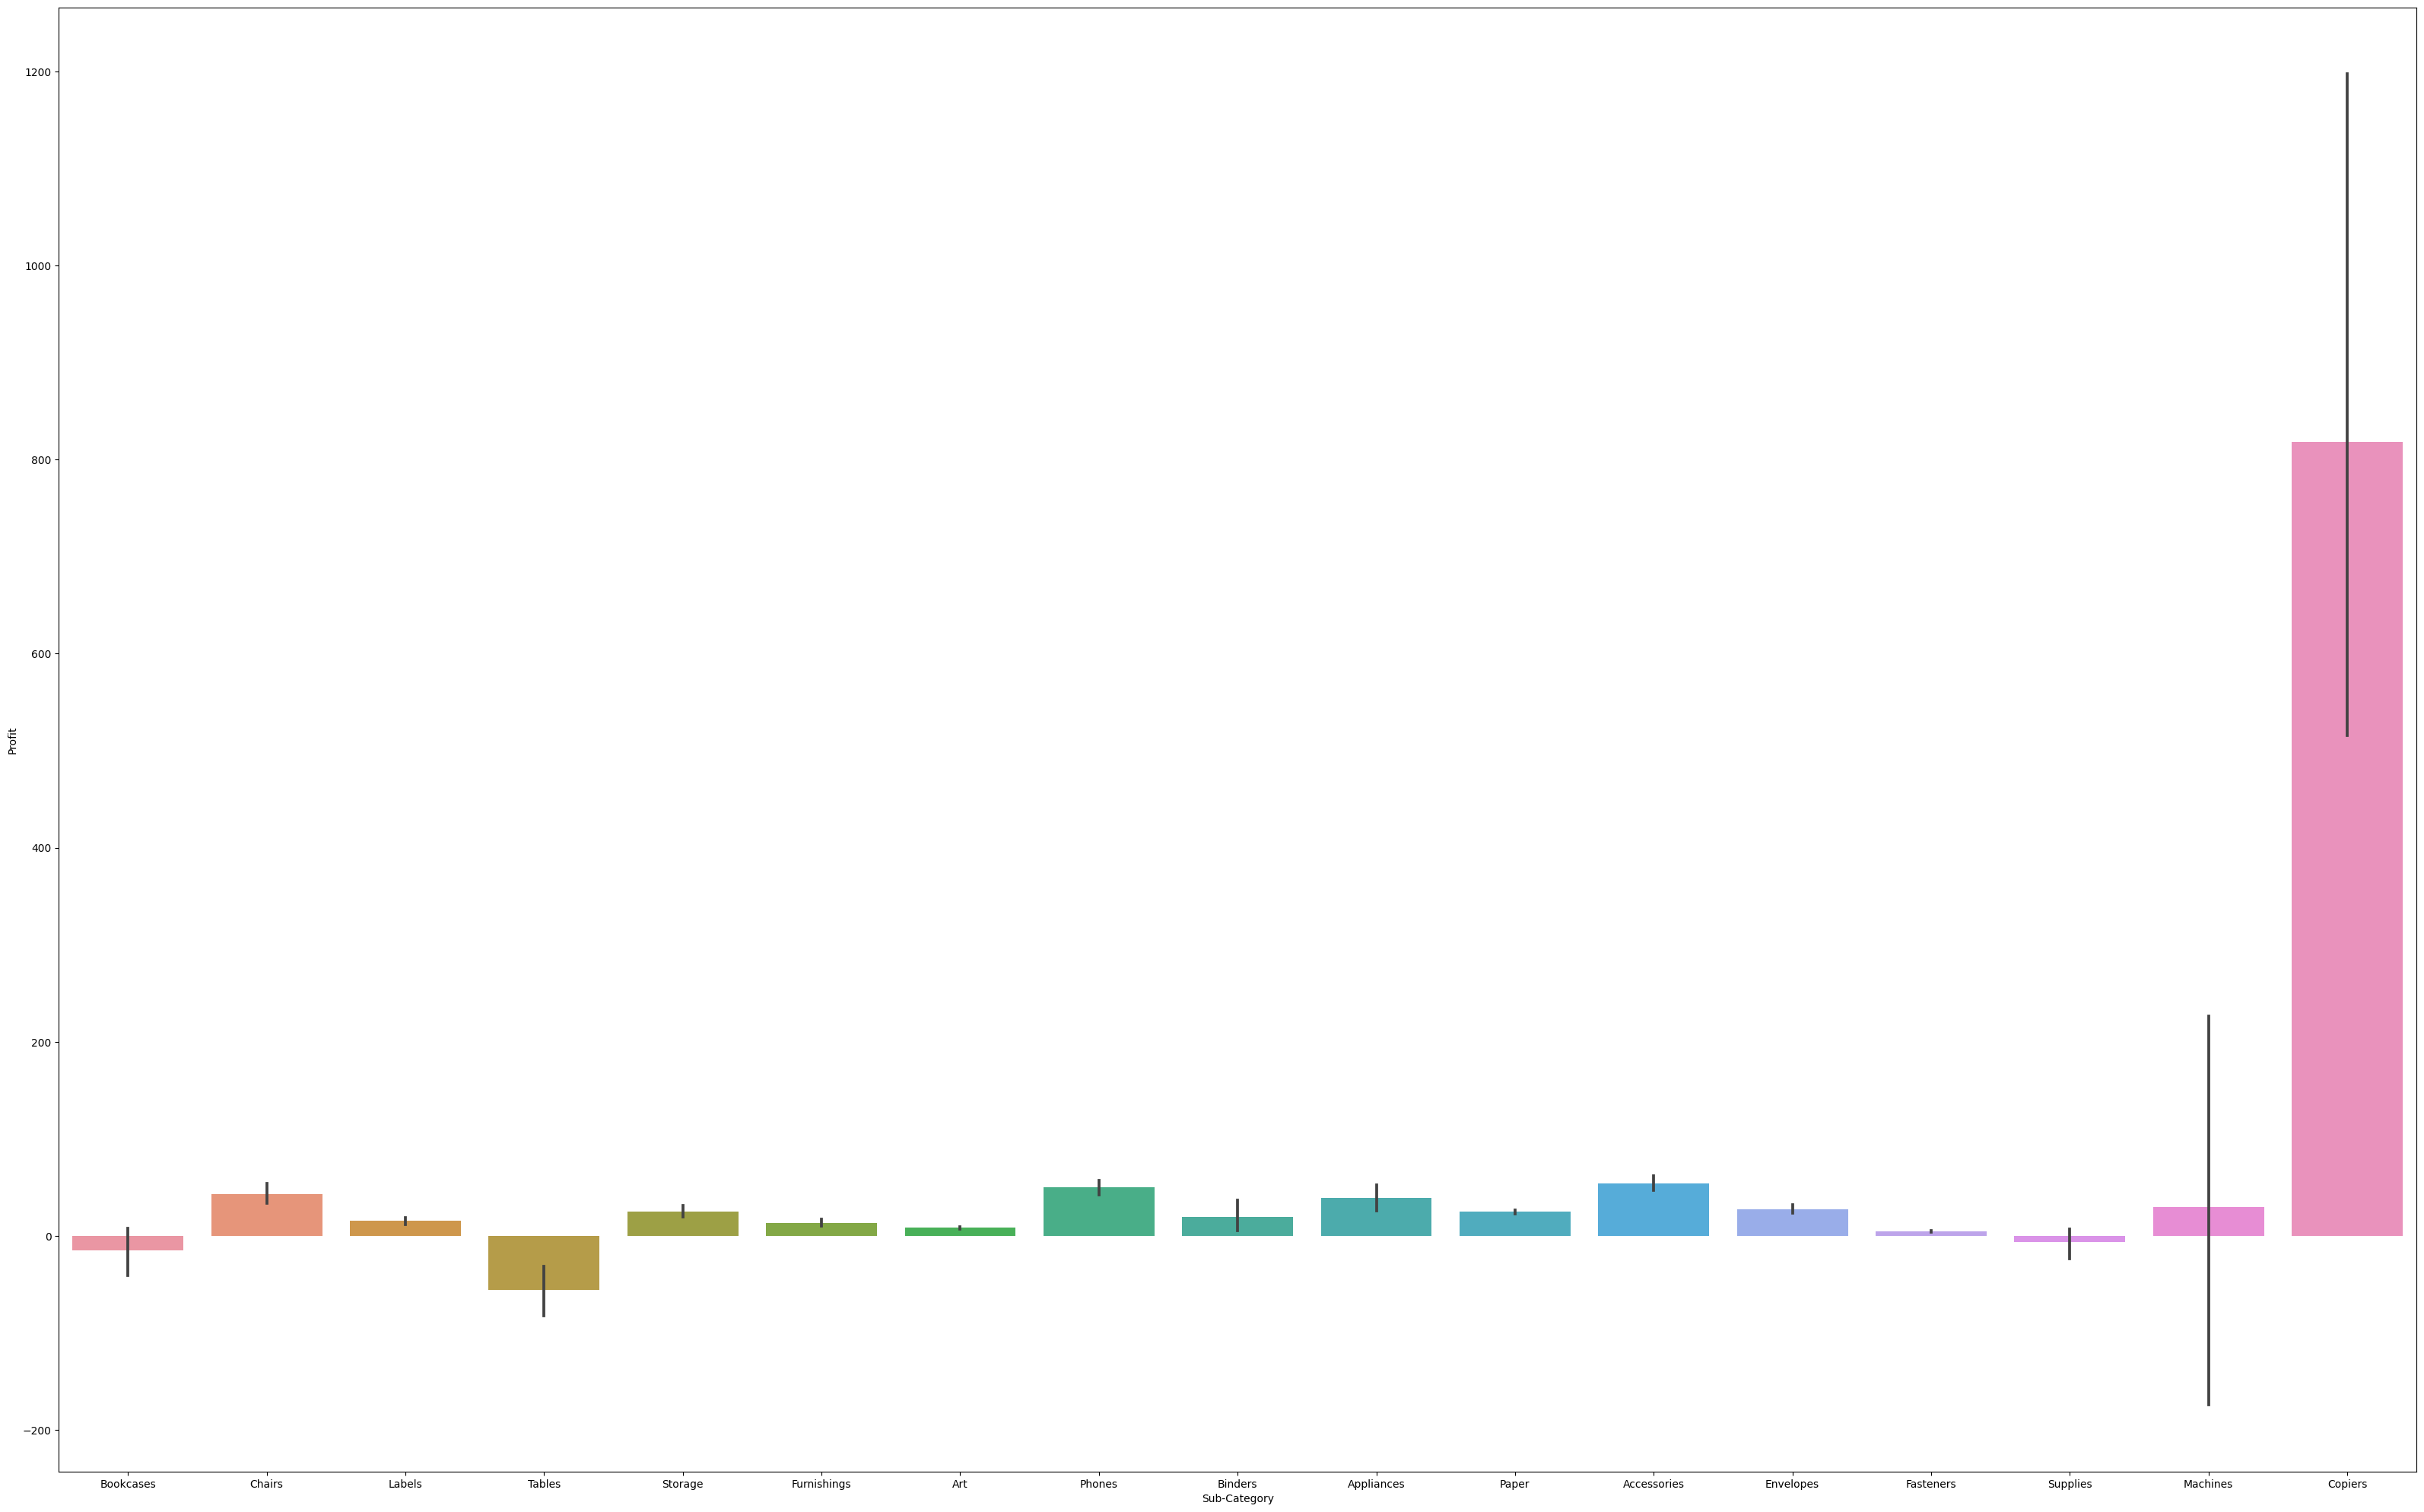

In [40]:
plt.figure(figsize=(40,25))
sns.barplot(x = df['Sub-Category'], y = df['Profit'])

## Line Plot of Discount Vs Profit

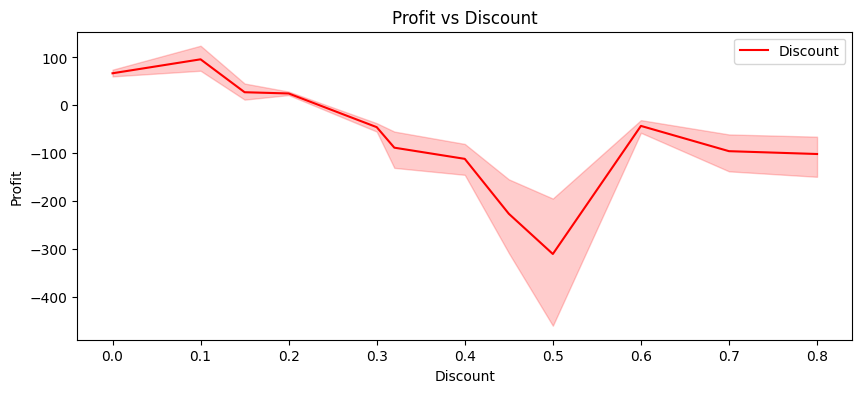

In [41]:
plt.figure(figsize = (10,4))
sns.lineplot(x='Discount',y='Profit', data = df, color = 'r', label='Discount')
plt.title('Profit vs Discount')
plt.show()

## Histogram of Data

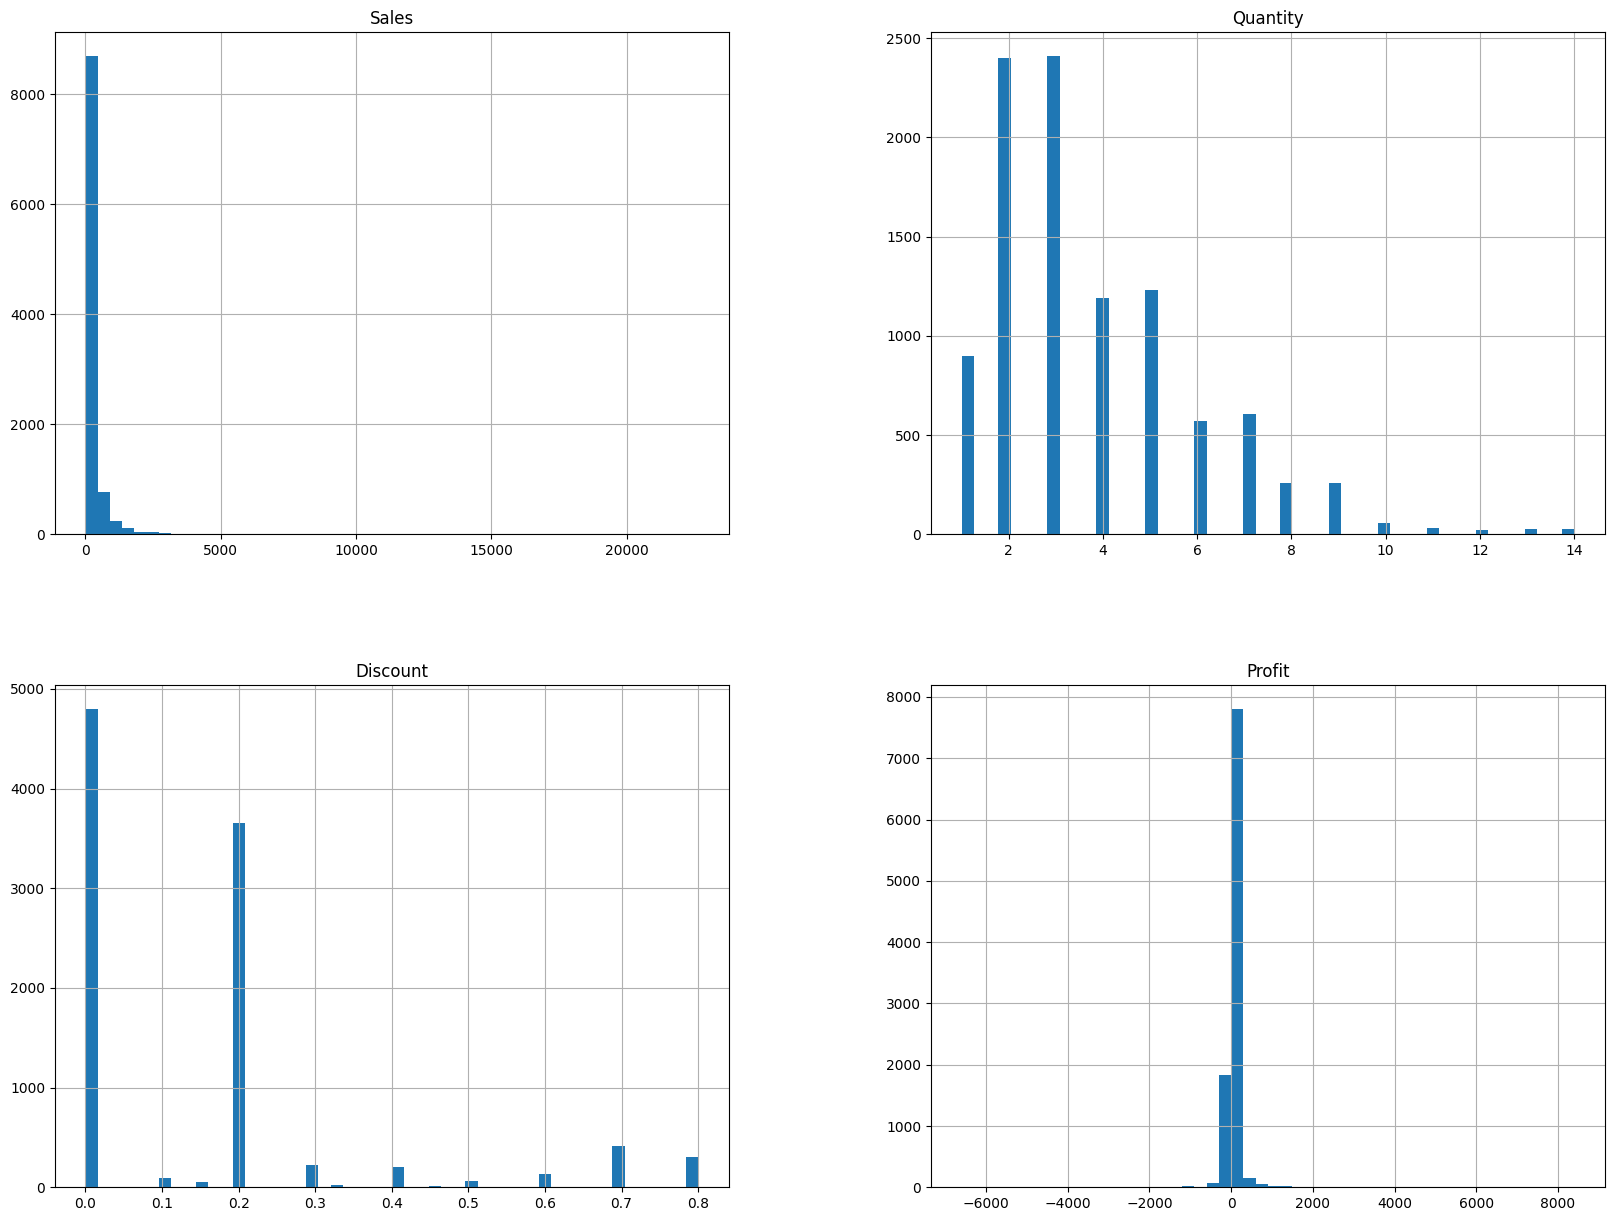

In [42]:
df.hist(bins=50,figsize=(20,15))
plt.show()

## Pair Plot of Sub-Category

<Figure size 1500x1000 with 0 Axes>

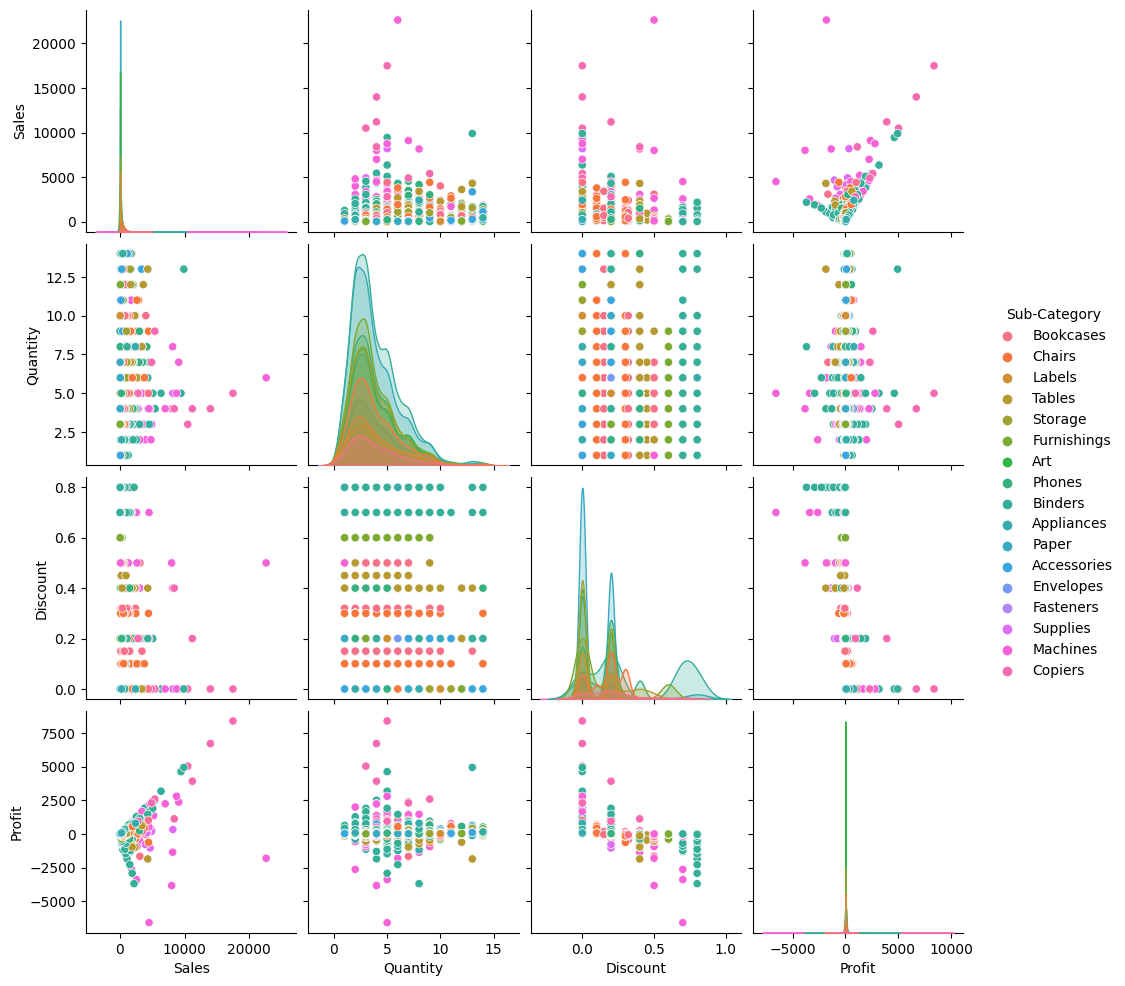

In [43]:
plt.figure(figsize=(15,10))
sns.pairplot(data = df,hue='Sub-Category')
plt.show()

## Summary of Data

In [44]:
grouped_data = pd.DataFrame(df.groupby(['Ship Mode','Segment','Sub-Category','Category','State','Region'])[['Quantity','Discount','Sales','Profit']].sum().reset_index())
grouped_data

,Ship Mode,Segment,Sub-Category,Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Accessories,Technology,Arizona,West,3,0.2,71.976,21.5928
1,First Class,Consumer,Accessories,Technology,Arkansas,South,17,0.0,565.110,225.4023
2,First Class,Consumer,Accessories,Technology,California,West,62,0.0,4813.210,1587.3939
3,First Class,Consumer,Accessories,Technology,Colorado,West,6,0.2,196.752,56.5662
4,First Class,Consumer,Accessories,Technology,Florida,South,3,0.4,30.136,1.5785
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Tables,Furniture,Oklahoma,Central,5,0.0,429.900,111.7740
2979,Standard Class,Home Office,Tables,Furniture,Oregon,West,3,0.5,564.195,-304.6653
2980,Standard Class,Home Office,Tables,Furniture,Pennsylvania,East,15,0.8,2220.084,-666.0252
2981,Standard Class,Home Office,Tables,Furniture,Texas,Central,5,0.6,664.447,-117.4841


## Statistical Summary of Data

In [45]:
df.groupby('State').Profit.agg(['sum','mean','min','max','count','median','std','var'])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


## Pair Plot of Data

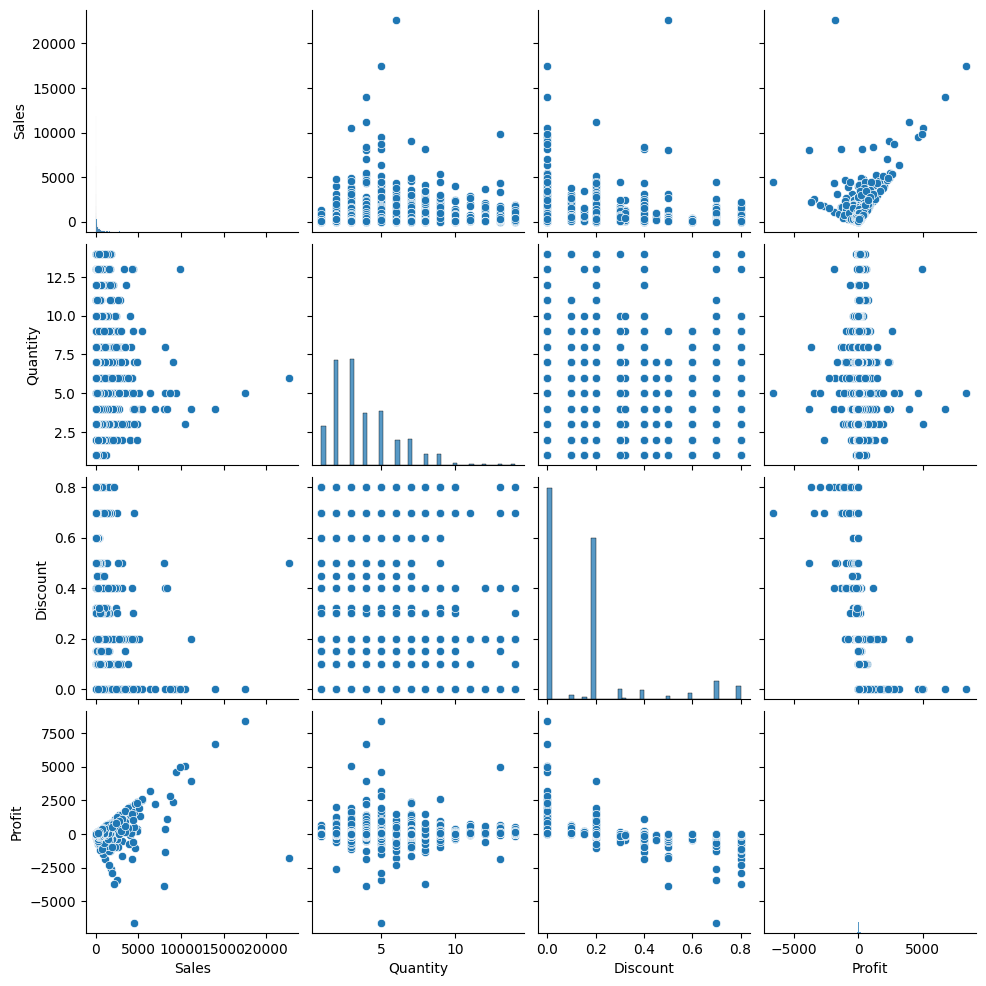

In [46]:
sns.pairplot(data=df)

## Box Plot of Sales

<Axes: >

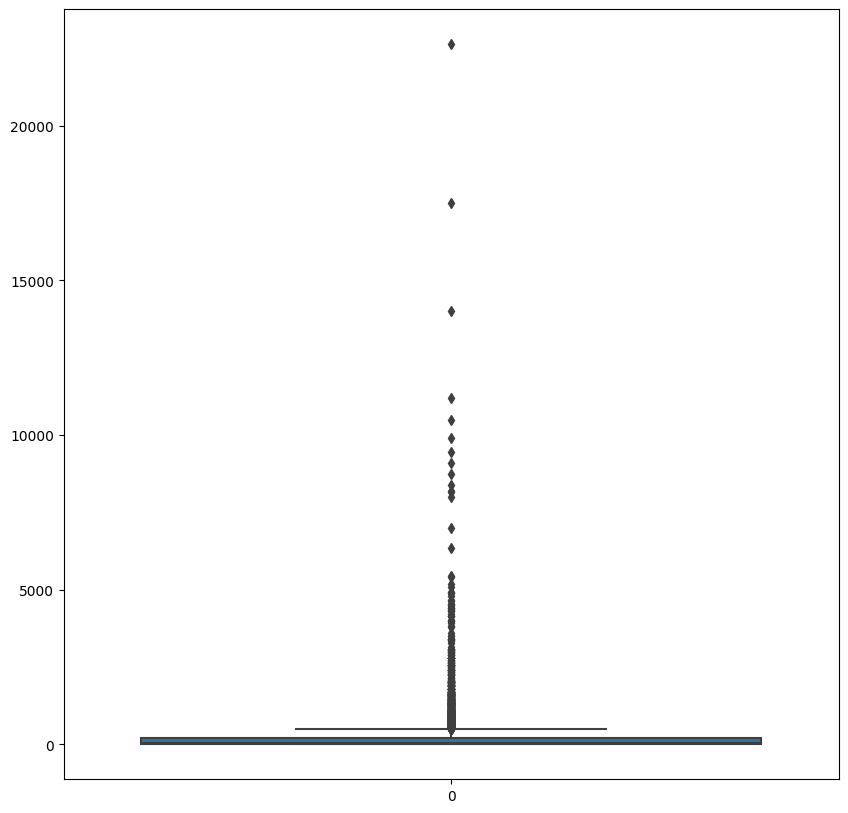

In [47]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(df['Sales'])

## Box Plot of Discount

<Axes: >

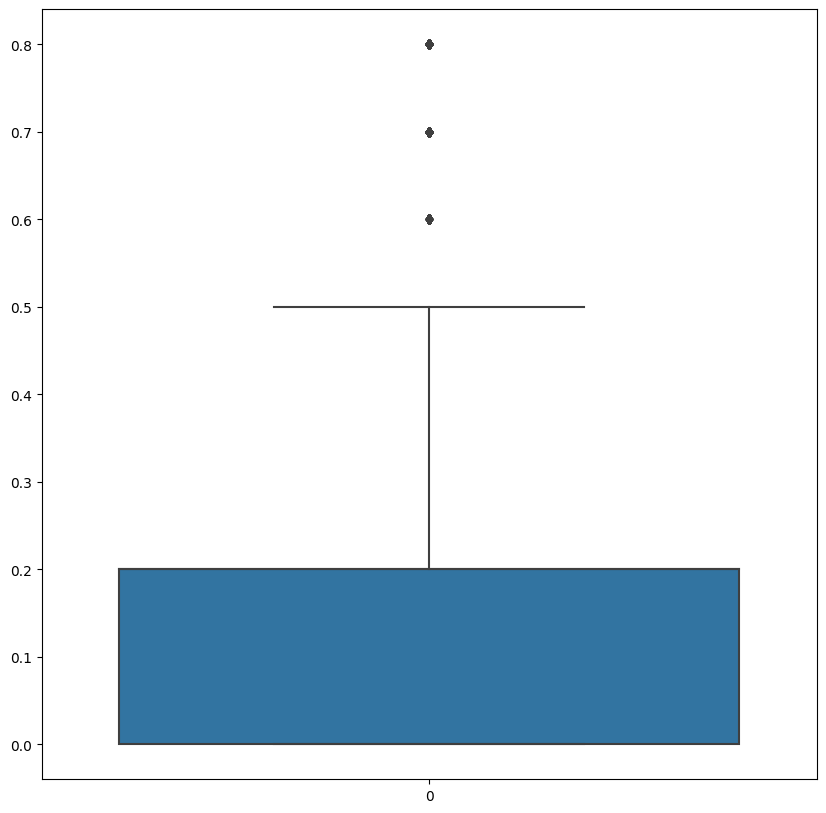

In [48]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(df['Discount'])

## Box Plot of Profit

<Axes: >

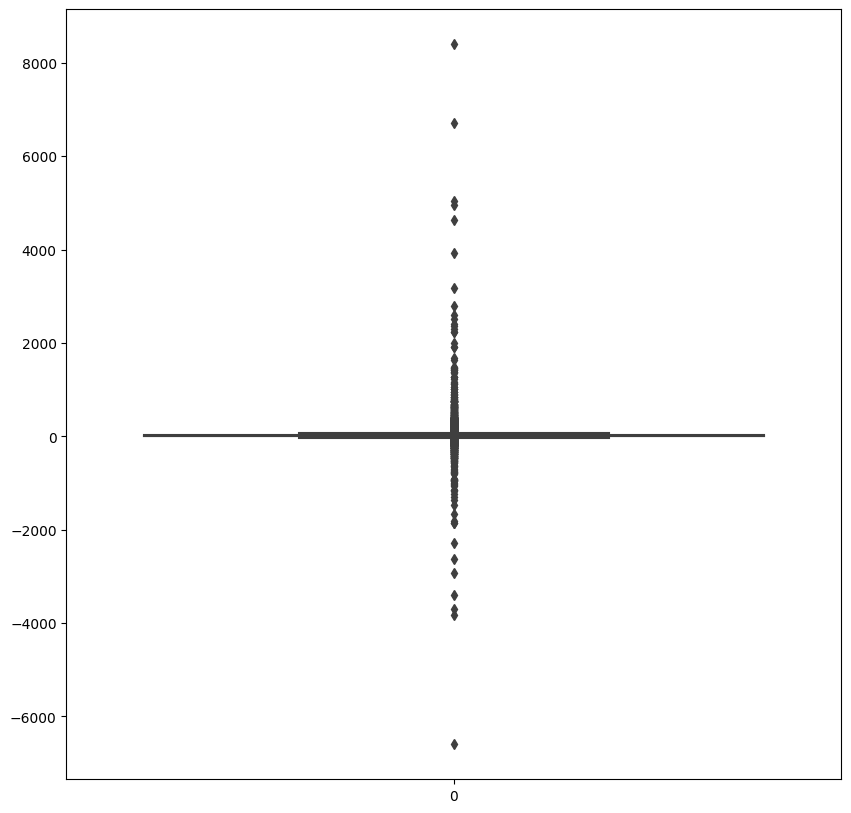

In [49]:
fig,axes = plt.subplots(figsize=(10,10))
sns.boxplot(df['Profit'])

In [50]:
Q1 = df.quantile(q = 0.25, axis =0, numeric_only = True, interpolation = 'linear')
Q3 = df.quantile(q = 0.75, axis =0, numeric_only = True, interpolation = 'linear')

IQR = Q3-Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


<Axes: xlabel='Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

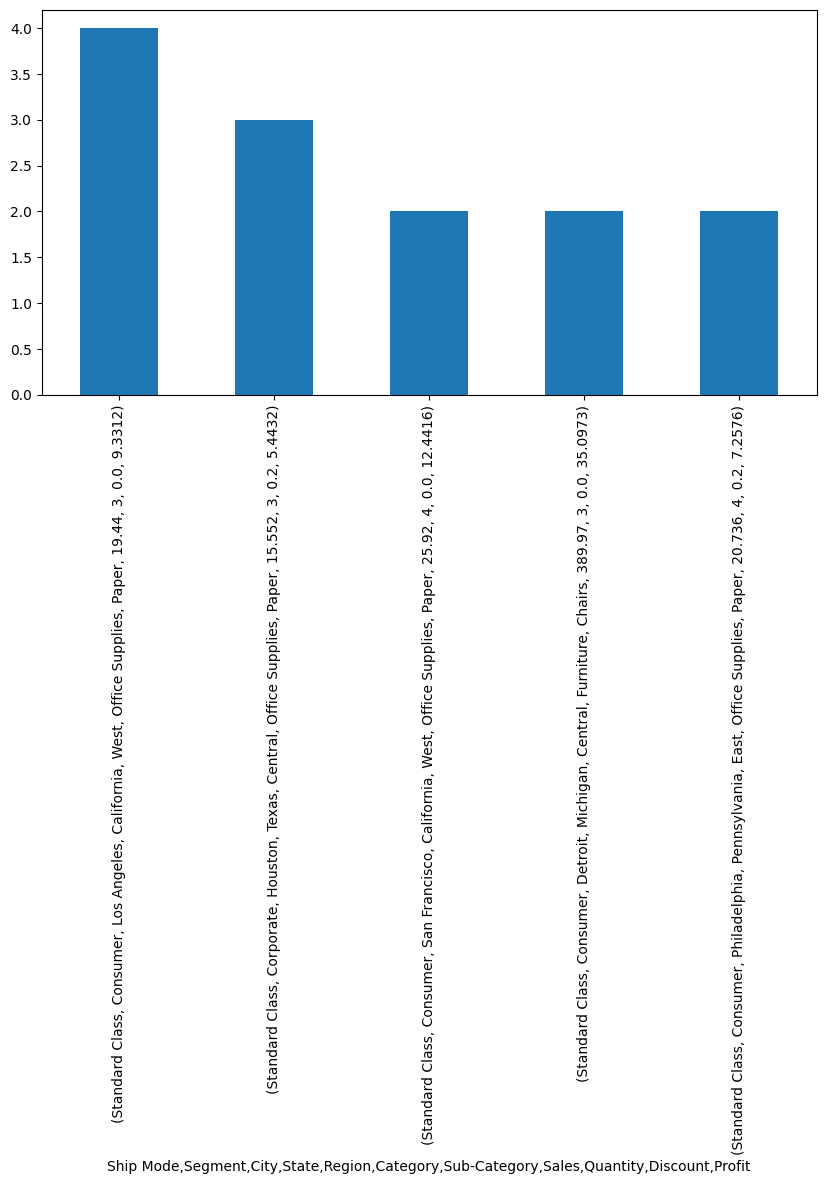

In [51]:
df.value_counts().nlargest().plot(kind = 'bar',figsize = (10,5))

## Plot of value Counts

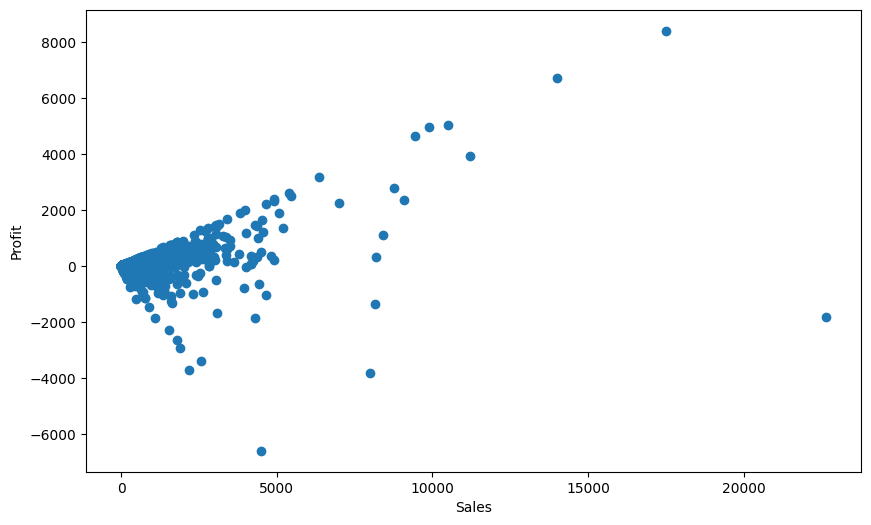

In [52]:
fig,ax = plt.subplots(figsize = (10,6))
ax.scatter(x=df['Sales'],y=df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

## Sales Statistical Data

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


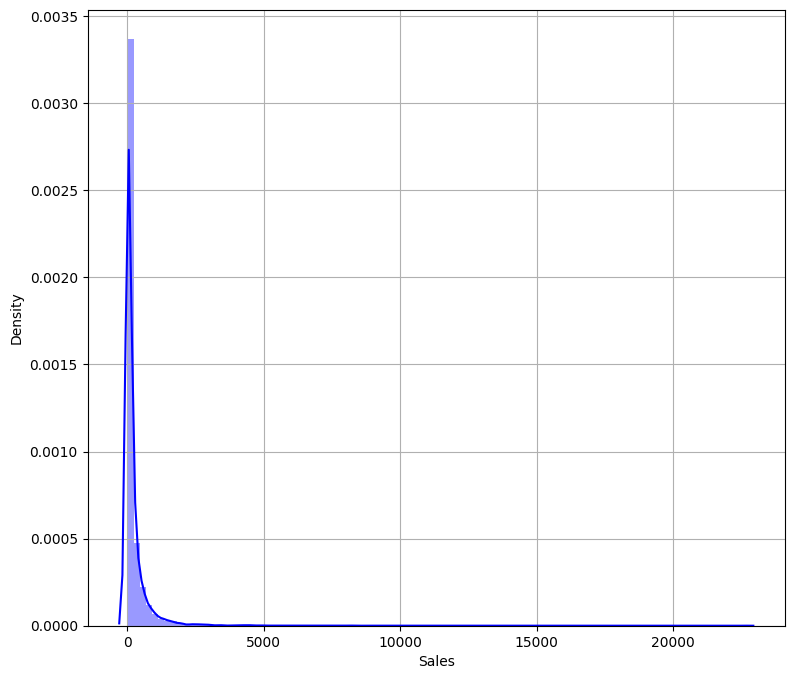

In [53]:
print(df['Sales'].describe())
plt.figure(figsize = (9,8))
plt.grid()
sns.distplot(df['Sales'],color = 'b', bins = 100, hist_kws = {'alpha': 0.4});

## Box plot of Sales, Quality, Discount & Profit

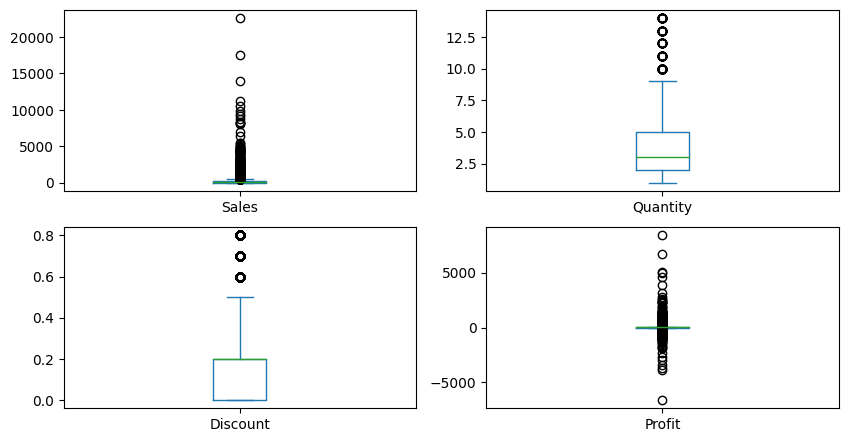

In [54]:
df.plot(kind='box',subplots=True, layout=(3,2), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = [14,12]
plt.show()

## Conclusion

1.> Profit in South & Central is Less.
2.> Profit in East & West Region is Better than South and Central.
3.> Highest Profit is Earned in Copiers while Selling price for Chairs and Phones is Extremely High compared to other products.
4.> Another interesting fact is that People dont prefer to buy Tables and Chairs and Book cases from Superstore. Hence these Departments are in loss.
5.> The store has Wide Variety of Office Supplies espacially in Binders and Paper Department.
6.> Negetive correlation between Profit and Discount.
7.> Total Sum of Profit in sale of Tables is Negetive.
8.> Profit is more in sale of Copiers.
9.> No or very less profit in sales of Supplies.
10.> Technology Segment is More Profitable.

### Thank You!!